# Исследование данных о продажах игр

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Открытие датасета и просмотр общей инфорамации

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Количество пропусков' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

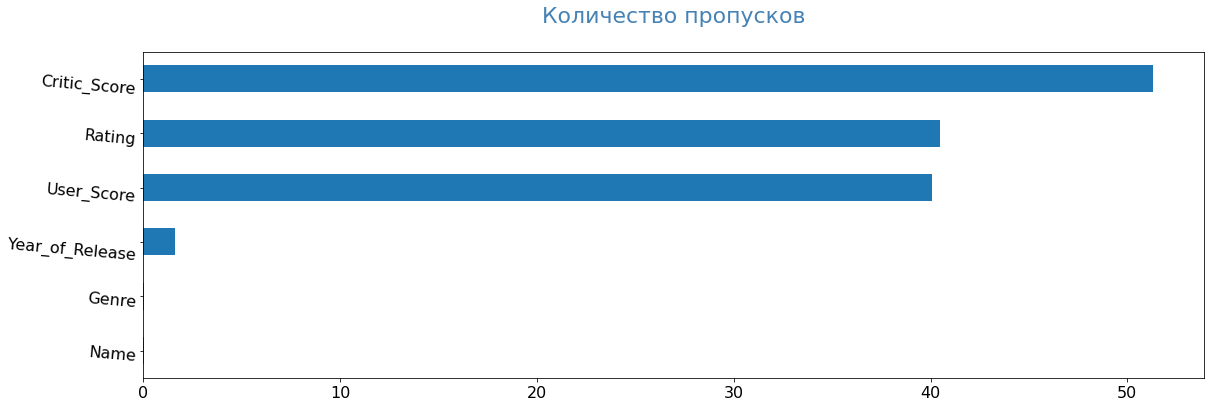

In [6]:
pass_value_barh(df)

In [7]:
pd.DataFrame(round(df.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
Name,0.000000
Platform,0.000000
Year_of_Release,1.600000
Genre,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.300000
User_Score,40.100000


## Подготовка данных

### Перевод названий столбцов к нижнему регистру

In [8]:
df.columns = df.columns.str.lower()

In [9]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Работа с пропусками

In [10]:
df.isna().mean()

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

In [11]:
#df.drop(df[df['year_of_release'].isna()].index, inplace = True)
df.drop(df[df['name'].isna()].index, inplace = True)
df.drop(df[df['genre'].isna()].index, inplace = True)

In [12]:
df[df['year_of_release'].isna()].sort_values(by = 'name')


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16293,AKB1/48: Idol to Guam de Koishitara...,X360,NaN,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN
11092,Action Man-Operation Extreme,PS,NaN,Action,0.05,0.03,0.00,0.01,NaN,NaN,NaN
3289,Advance Wars: Days of Ruin,DS,NaN,Strategy,0.43,0.12,0.00,0.05,86.0,8.7,E10+
1506,Adventure,2600,NaN,Adventure,1.21,0.08,0.00,0.01,NaN,NaN,NaN
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7332,Yu Yu Hakusho: Dark Tournament,PS2,NaN,Fighting,0.10,0.08,0.00,0.03,56.0,8.5,T
15557,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,0.00,0.00,0.02,0.00,NaN,NaN,NaN
11433,Zero: Tsukihami no Kamen,Wii,NaN,Action,0.00,0.00,0.08,0.00,NaN,NaN,NaN
8884,eJay Clubworld,PS2,NaN,Misc,0.07,0.06,0.00,0.02,69.0,8.6,E


In [13]:
df['year_of_release'].isna().sum()

269

In [14]:
df['year_of_release'] = df.fillna({'year_of_release': df.groupby(['name'])['year_of_release'].transform('mean')})['year_of_release'].round()

In [15]:
df['year_of_release'].isna().sum()

146

In [16]:
df.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.008736
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513133
user_score         0.400826
rating             0.404715
dtype: float64

In [17]:
df.drop(df[df['year_of_release'].isna()].index, inplace = True)

### Изменение типа данных

In [18]:
df['year_of_release'] = df['year_of_release'].astype('int')
df['critic_score'] = df['critic_score']/10

In [19]:
print(df['critic_score'].sort_values().unique())
print(df['user_score'].sort_values().unique())

[1.3 1.7 1.9 2.  2.1 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 nan]
['0' '0.2' '0.3' '0.5' '0.6' '0.7' '0.9' '1' '1.1' '1.2' '1.3' '1.4' '1.5'
 '1.6' '1.7' '1.8' '1.9' '2' '2.1' '2.2' '2.3' '2.4' '2.5' '2.6' '2.7'
 '2.8' '2.9' '3' '3.1' '3.2' '3.3' '3.4' '3.5' '3.6' '3.7' '3.8' '3.9' '4'
 '4.1' '4.2' '4.3' '4.4' '4.5' '4.6' '4.7' '4.8' '4.9' '5' '5.1' '5.2'
 '5.3' '5.4' '5.5' '5.6' '5.7' '5.8' '5.9' '6' '6.1' '6.2' '6.3' '6.4'
 '6.5' '6.6' '6.7' '6.8' '6.9' '7' '7.1' '7.2' '7.3' '7.4' '7.5' '7.6'
 '7.7' '7.8' '7.9' '8' '8.1' '8.2' '8.3' '8.4' '8.5' '8.6' '8.7' '8.8'
 '8.9' '9' '9.1' '9.2' '9.3' '9.4' '9.5' '9.6' '9.7' 'tbd' nan]


In [20]:
#Игры с одинаковыми названиями и разными платформами, в тех местах где есть пропуски \
#заполним средним значением для этой игры по всем платформам
df['critic_score'] = df.fillna({'critic_score': df.groupby(['name'])['critic_score']\
                                   .transform('mean')})['critic_score'].round(1)

In [21]:
df.loc[df['user_score'] == 'tbd','user_score'] = np.nan

In [22]:
#Перевели значения user_score 
df.loc[df['user_score'] != 'tbd','user_score'] = df.loc[df['user_score'] != 'tbd','user_score'].astype('float')

In [23]:
df.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.454639
user_score         0.544878
rating             0.404358
dtype: float64

In [24]:
print(df[df['user_score'] == 0].user_score.count())
df.drop(df[df['user_score'] == 0].index, inplace = True)
#Удалили игру с рейтингом ноль.

1


In [25]:
df['user_score'] = df.fillna({'user_score': df.groupby(['name'])['user_score']\
                                   .transform('mean')})['user_score'].round(1)

In [26]:
df.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.454606
user_score         0.478571
rating             0.404382
dtype: float64

### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.


In [27]:
df['sum_sales'] = df.loc[:,'na_sales':'other_sales'].sum(axis = 1)

In [28]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,7.6,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,8.2,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,8.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [29]:
df.duplicated().sum()

0

## Исследовательский анализ данных

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

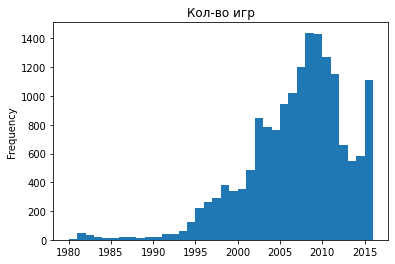

In [30]:
df.year_of_release.plot.hist( bins = df['year_of_release'].max()- df['year_of_release'].min()\
                             , title = 'Кол-во игр');

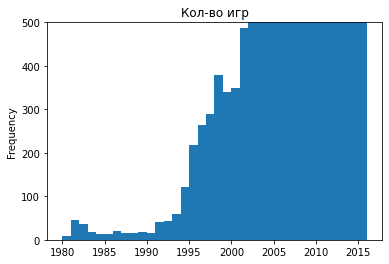

In [31]:
df.year_of_release.plot.hist( bins = df['year_of_release'].max()- df['year_of_release'].min()\
                             , title = 'Кол-во игр', ylim = (0, 500));

In [32]:
print('Кол-во вышедших игр с 1980 по 1995 год:',df[df['year_of_release'] < 1996]['name'].count())
print('Доля вышедших игр с 1980 по 1995 год:',df[df['year_of_release'] < 1996]['name'].count()/df['name'].count())
print('Кол-во вышедших игр в 2004 году:',df[df['year_of_release'] == 2004]['name'].count())

Кол-во вышедших игр с 1980 по 1995 год: 705
Доля вышедших игр с 1980 по 1995 год: 0.04255704454907642
Кол-во вышедших игр в 2004 году: 765


### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [33]:
df.pivot_table(index = 'platform', values = 'sum_sales',aggfunc = 'sum').sort_values(by = 'sum_sales',ascending = False)

,sum_sales
platform,
PS2,1247.16
X360,966.61
PS3,935.19
Wii,903.31
DS,803.56
PS,727.58
PS4,314.14
GBA,313.73
PSP,293.57


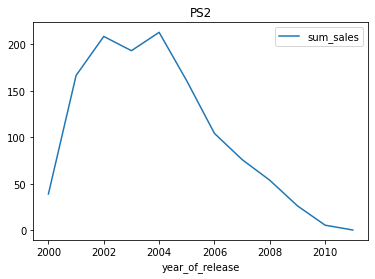

In [34]:
df[df['platform'] == 'PS2'].pivot_table(index = 'year_of_release', values = 'sum_sales',aggfunc = (sum)).plot(title = 'PS2');

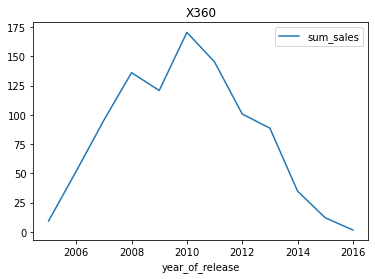

In [35]:
df[df['platform'] == 'X360'].pivot_table(index = 'year_of_release', values = 'sum_sales',aggfunc = (sum)).plot(title = 'X360');

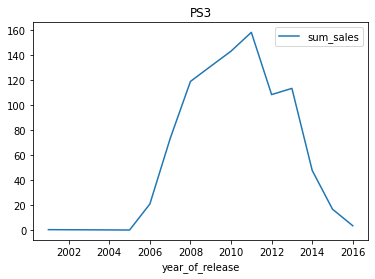

In [36]:
df[df['platform'] == 'PS3'].pivot_table(index = 'year_of_release', values = 'sum_sales',aggfunc = (sum)).plot(title = 'PS3');

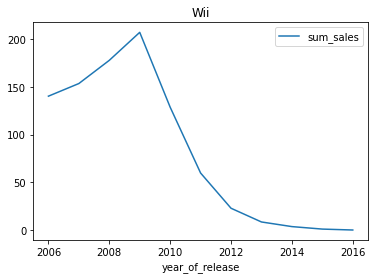

In [37]:
df[df['platform'] == 'Wii'].pivot_table(index = 'year_of_release', values = 'sum_sales',aggfunc = (sum)).plot(title = 'Wii');

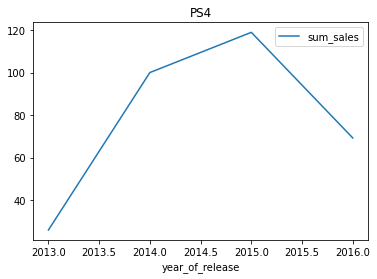

In [38]:
df[df['platform'] == 'PS4'].pivot_table(index = 'year_of_release', values = 'sum_sales',aggfunc = (sum)).plot(title = 'PS4');

### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

In [39]:
df_actual = df[df['year_of_release'] >= 2012]

In [40]:
df_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,9.7,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,9.7,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,8.3,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [41]:
df_actual.pivot_table(index = 'platform', values = 'sum_sales',aggfunc = 'sum').sort_values(by = 'sum_sales',ascending = False)

,sum_sales
platform,
PS4,314.14
PS3,289.71
X360,237.52
3DS,195.01
XOne,159.32
WiiU,82.19
PC,63.51
PSV,49.18
Wii,36.60


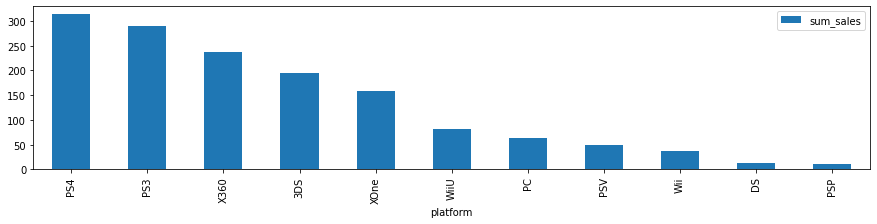

In [42]:
df_actual.pivot_table(index = 'platform', values = 'sum_sales',aggfunc = 'sum')\
.sort_values(by = 'sum_sales',ascending = False).plot(kind = 'bar',figsize = (15,3));

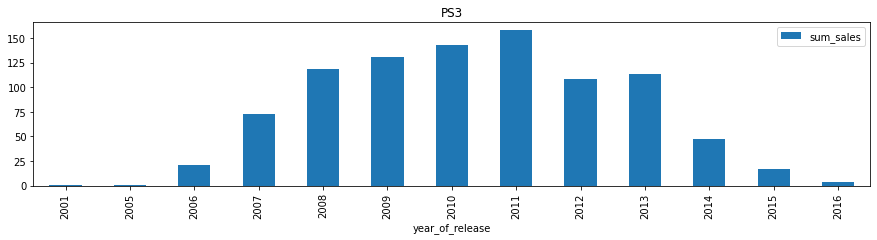

In [43]:
df[df['platform'] == 'PS3'].pivot_table(index = 'year_of_release', values = 'sum_sales',aggfunc = (sum))\
.plot(kind = 'bar',title = 'PS3',figsize = (15,3));

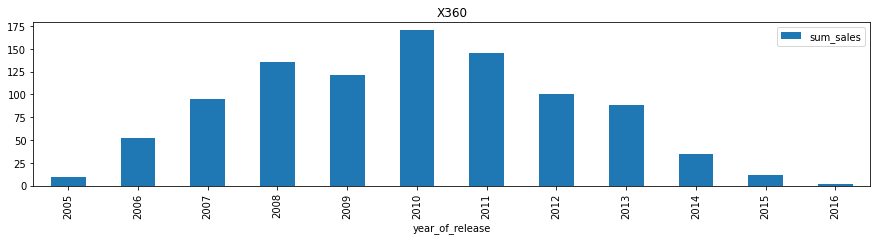

In [44]:
df[df['platform'] == 'X360'].pivot_table(index = 'year_of_release', values = 'sum_sales',aggfunc = (sum))\
.plot(kind = 'bar',title = 'X360',figsize = (15,3));

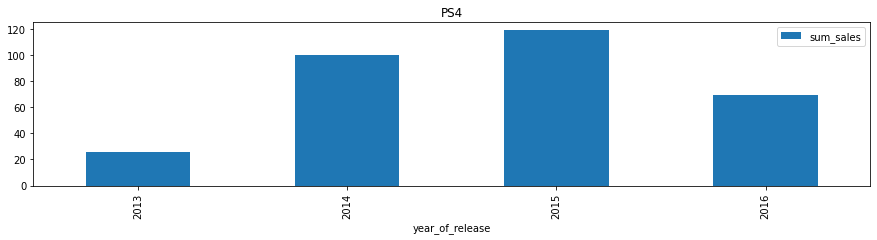

In [45]:
df[df['platform'] == 'PS4'].pivot_table(index = 'year_of_release', values = 'sum_sales',aggfunc = (sum))\
.plot(kind = 'bar',title = 'PS4',figsize = (15,3));

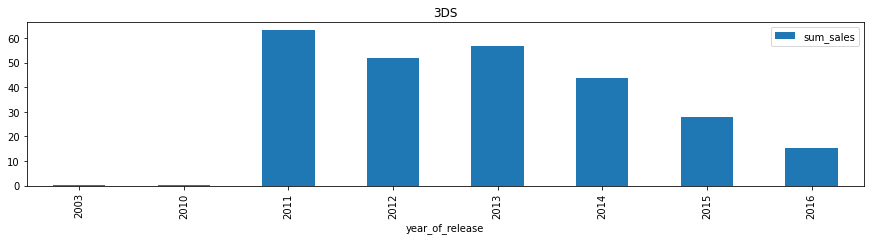

In [46]:
df[df['platform'] == '3DS'].pivot_table(index = 'year_of_release', values = 'sum_sales',aggfunc = (sum))\
.plot(kind = 'bar',title = '3DS',figsize = (15,3));

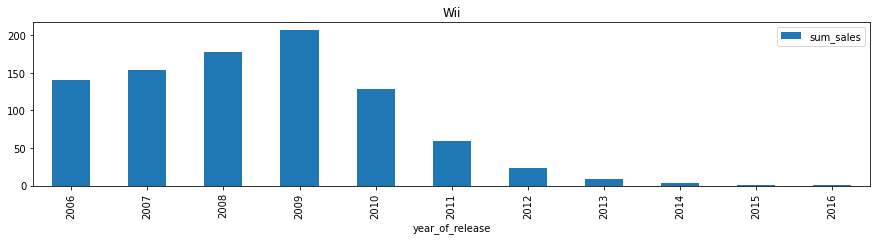

In [47]:
df[df['platform'] == 'Wii'].pivot_table(index = 'year_of_release', values = 'sum_sales',aggfunc = (sum))\
.plot(kind = 'bar',title = 'Wii',figsize = (15,3));

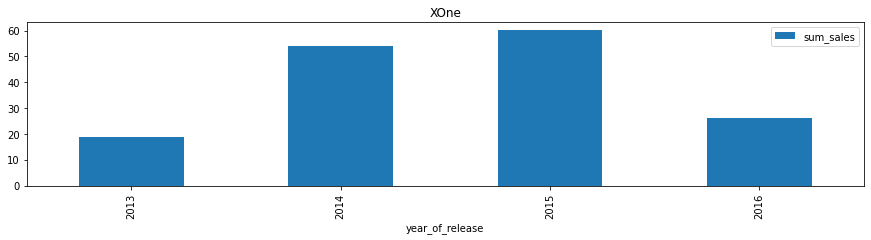

In [48]:
df[df['platform'] == 'XOne'].pivot_table(index = 'year_of_release', values = 'sum_sales',aggfunc = (sum))\
.plot(kind = 'bar',title = 'XOne',figsize = (15,3));

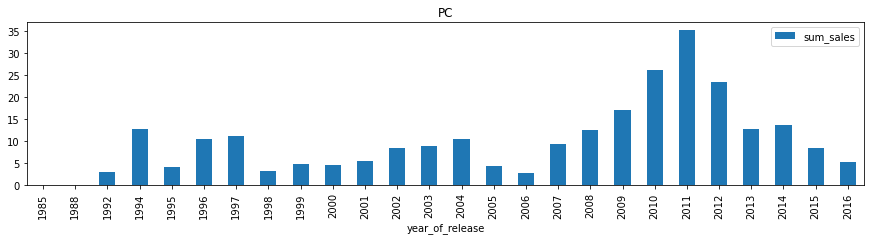

In [49]:
df[df['platform'] == 'PC'].pivot_table(index = 'year_of_release', values = 'sum_sales',aggfunc = (sum))\
.plot(kind='bar',title = 'PC',figsize = (15,3));

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [50]:
df_actual.pivot_table(index = 'platform', values = 'sum_sales',aggfunc = 'sum').sort_values(by = 'sum_sales',ascending = False)

,sum_sales
platform,
PS4,314.14
PS3,289.71
X360,237.52
3DS,195.01
XOne,159.32
WiiU,82.19
PC,63.51
PSV,49.18
Wii,36.60


Text(0, 0.5, 'Глобальные продажи')

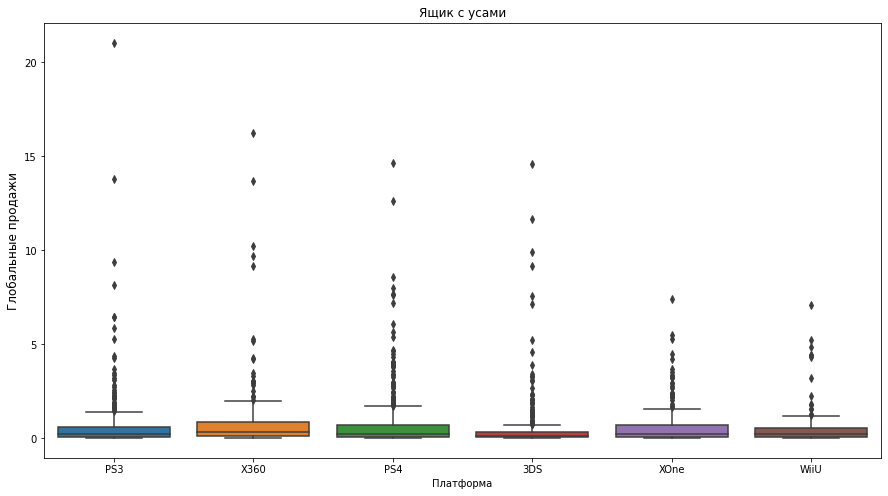

In [51]:
df_top = df_actual.query('platform in ["PS4","PS3","X360","3DS","XOne","WiiU"]')
plt.figure(figsize=(15,8))
#plt.ylim(0,5)
sns.boxplot(data=df_top, x='platform', y='sum_sales')
plt.title('Ящик с усами')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи',fontsize=12)


(0.0, 1.0)

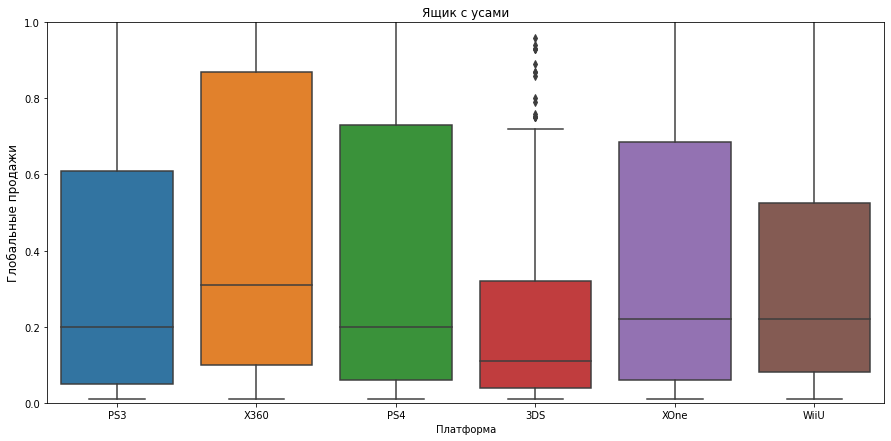

In [52]:
df_top = df_actual.query('platform in ["PS4","PS3","X360","3DS","XOne","WiiU"]')
plt.figure(figsize=(15,7))
sns.boxplot(data=df_top, x='platform', y='sum_sales')
plt.title('Ящик с усами')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи',fontsize=12)
plt.ylim(0,1)

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

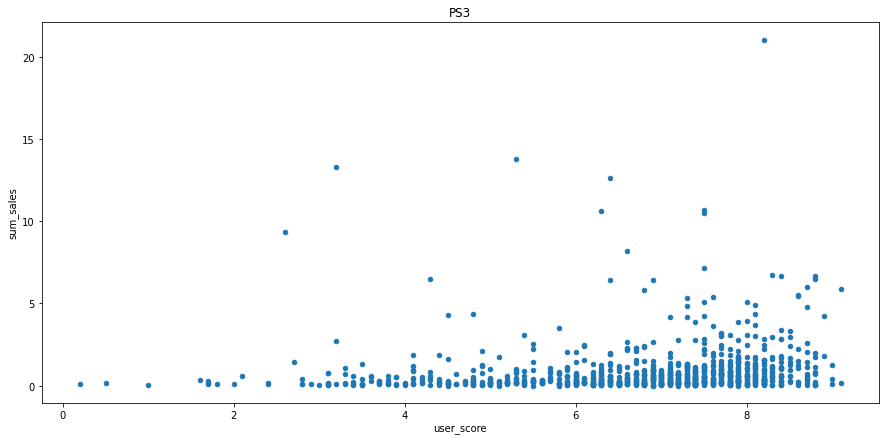

In [53]:
df[df['platform'] == 'PS3'].plot(kind = 'scatter', x = 'user_score', y = 'sum_sales',figsize = (15,7), title = 'PS3');

In [54]:
df.loc[df['platform'] == 'PS3',['user_score','sum_sales']].corr()     

,user_score,sum_sales
user_score,1.000000,0.129268
sum_sales,0.129268,1.000000


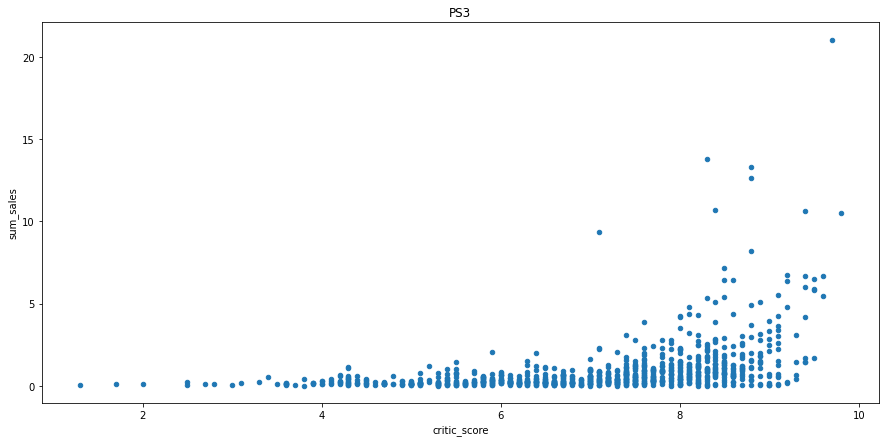

In [55]:
df[df['platform'] == 'PS3'].plot(kind = 'scatter', x = 'critic_score', y = 'sum_sales',figsize = (15,7),title = 'PS3');

In [56]:
df.loc[df['platform'] == 'PS3',['critic_score','sum_sales']].corr()


,critic_score,sum_sales
critic_score,1.000000,0.406586
sum_sales,0.406586,1.000000


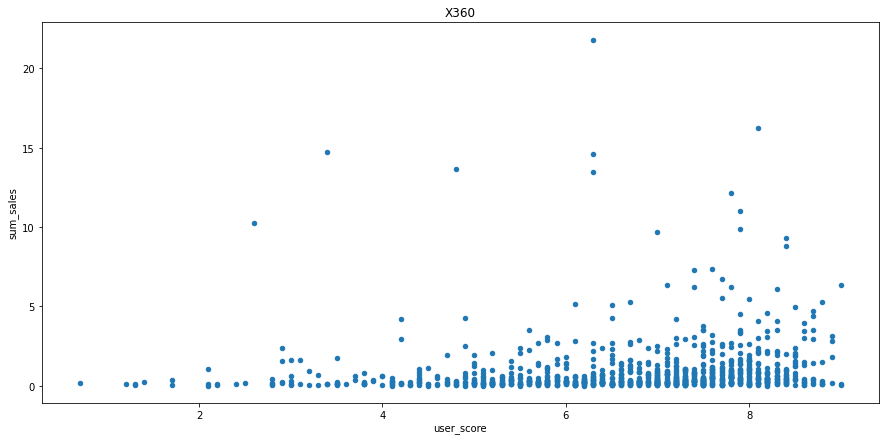

In [57]:
df[df['platform'] == 'X360'].plot(kind = 'scatter', x = 'user_score', y = 'sum_sales',figsize = (15,7), title = 'X360');

In [58]:
df.loc[df['platform'] == 'X360',['user_score','sum_sales']].corr()     

,user_score,sum_sales
user_score,1.000000,0.116392
sum_sales,0.116392,1.000000


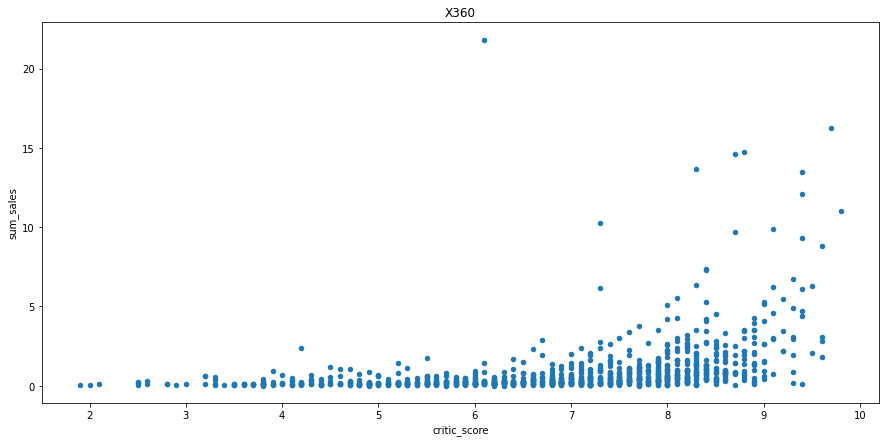

In [59]:
df[df['platform'] == 'X360'].plot(kind = 'scatter', x = 'critic_score', y = 'sum_sales',figsize = (15,7), title = 'X360');

In [60]:
df.loc[df['platform'] == 'X360',['critic_score','sum_sales']].corr()     

,critic_score,sum_sales
critic_score,1.000000,0.378129
sum_sales,0.378129,1.000000


PS4               critic_score  sum_sales
critic_score      1.000000   0.391409
sum_sales         0.391409   1.000000 

PS4             user_score  sum_sales
user_score    1.000000  -0.021589
sum_sales    -0.021589   1.000000 
 ---------------------------------------
3DS               critic_score  sum_sales
critic_score      1.000000   0.321439
sum_sales         0.321439   1.000000 

3DS             user_score  sum_sales
user_score    1.000000   0.231594
sum_sales     0.231594   1.000000 
 ---------------------------------------
XOne               critic_score  sum_sales
critic_score      1.000000   0.373767
sum_sales         0.373767   1.000000 

XOne             user_score  sum_sales
user_score     1.00000   -0.09416
sum_sales     -0.09416    1.00000 
 ---------------------------------------
WiiU               critic_score  sum_sales
critic_score      1.000000   0.327304
sum_sales         0.327304   1.000000 

WiiU             user_score  sum_sales
user_score    1.000000   0.367253


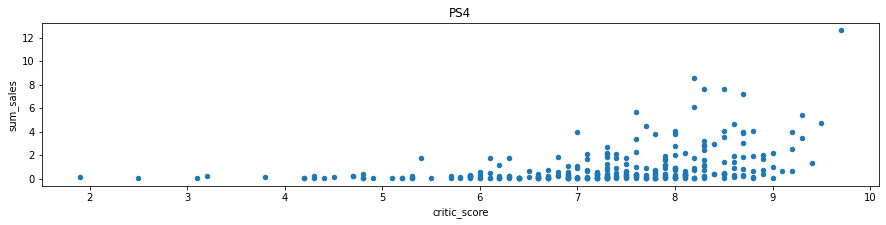

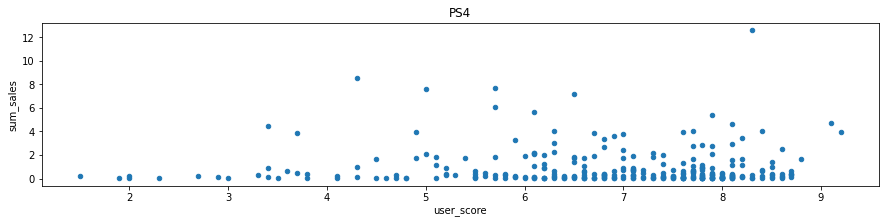

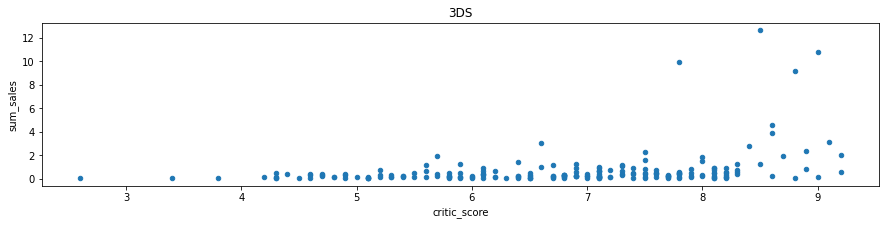

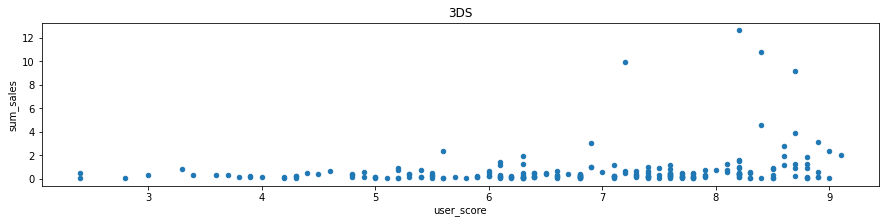

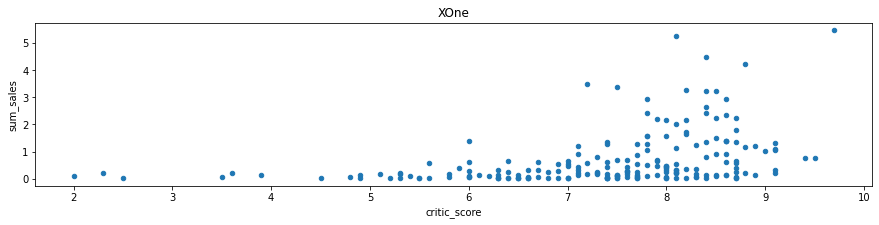

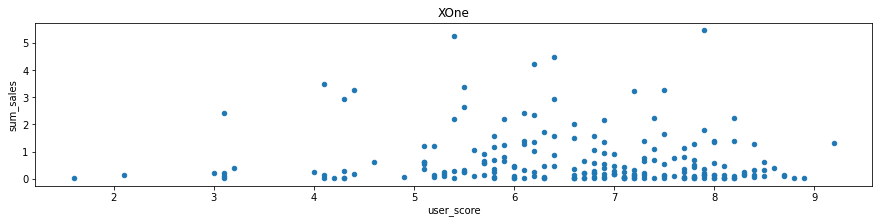

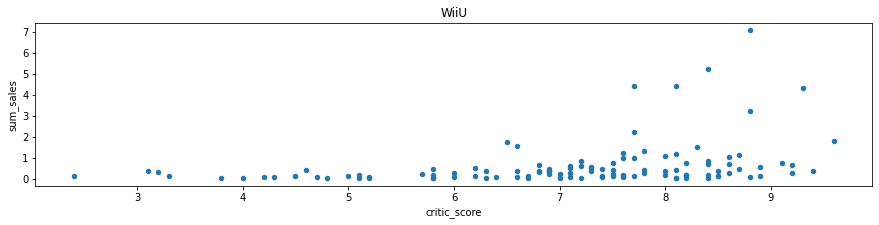

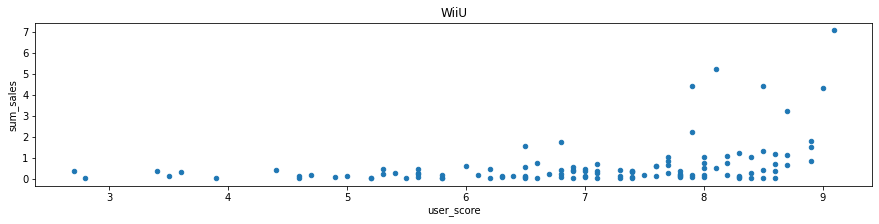

In [61]:
list_pop_platform = ['PS4','3DS','XOne','WiiU']

for i in list_pop_platform:
    df[df['platform'] == i].plot(kind = 'scatter', x = 'critic_score', y = 'sum_sales',figsize = (15,3), title = i);
    df[df['platform'] == i].plot(kind = 'scatter', x = 'user_score', y = 'sum_sales',figsize = (15,3), title = i);
    print(i,df.loc[df['platform'] == i,['critic_score','sum_sales']].corr(),'\n')
    print(i,df.loc[df['platform'] == i,['user_score','sum_sales']].corr(),'\n','---------------------------------------')   

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

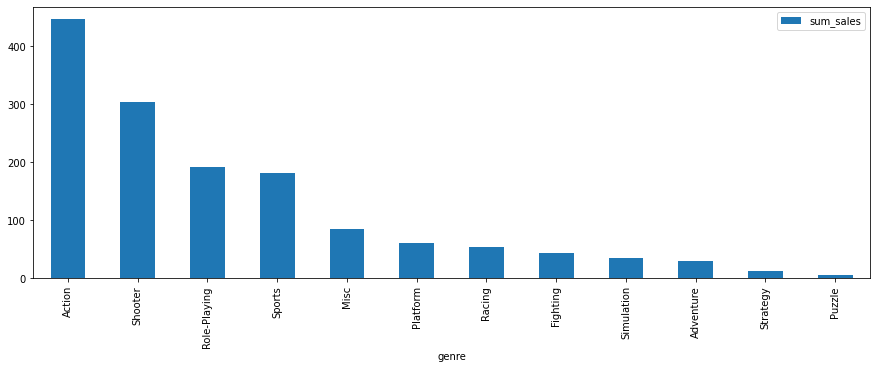

In [84]:
df_actual.pivot_table(index = 'genre', values = 'sum_sales', aggfunc = 'sum').sort_values(by = 'sum_sales',ascending = False)\
.plot(kind='bar',figsize = (15,5));

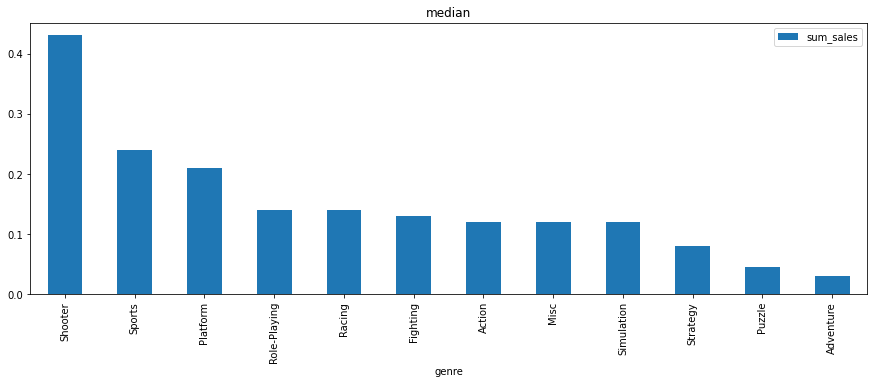

In [85]:
df_actual.pivot_table(index = 'genre', values = 'sum_sales', aggfunc = 'median').sort_values(by = 'sum_sales',ascending = False)\
.plot(kind='bar',figsize = (15,5),title = 'median');

Text(0, 0.5, 'Глобальные продажи')

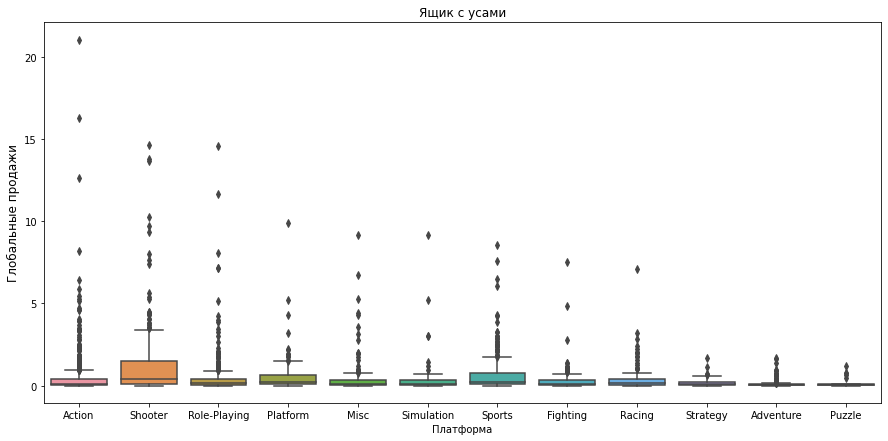

In [99]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df_actual, x='genre', y='sum_sales')
plt.title('Ящик с усами')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи',fontsize=12)

(0.0, 2.0)

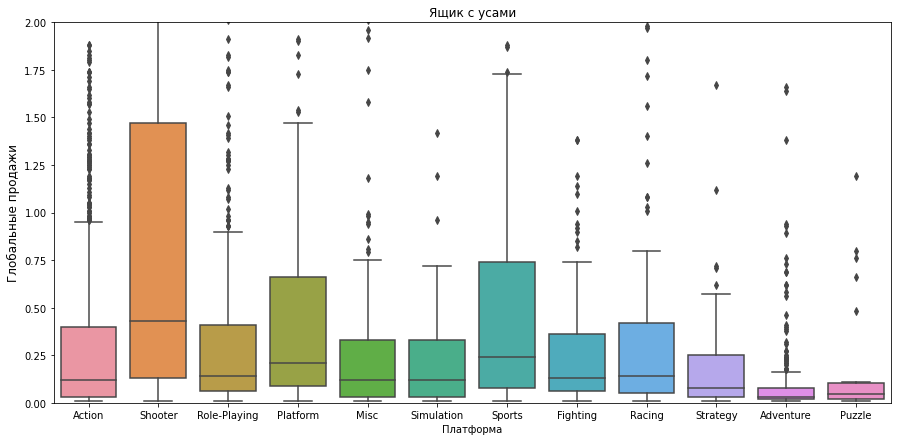

In [102]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df_actual, x='genre', y='sum_sales')
plt.title('Ящик с усами')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи',fontsize=12)
plt.ylim(0,2)

##  Составьте портрет пользователя каждого региона

### Самые популярные платформы (топ-5). Опишите различия в долях продаж.

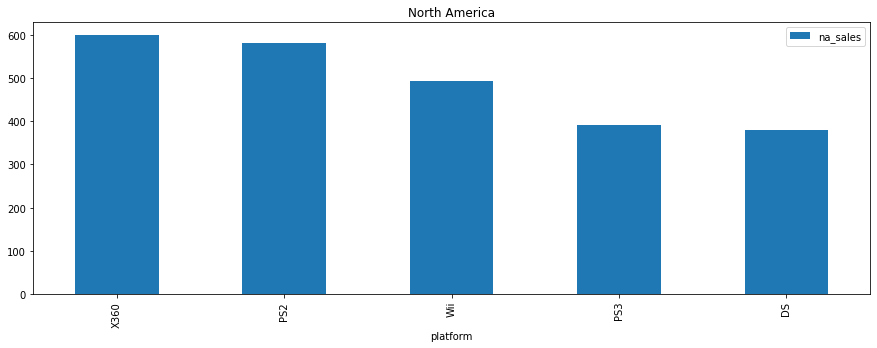

In [64]:
df.pivot_table(index = 'platform', values = 'na_sales',aggfunc = 'sum')\
.sort_values(by = 'na_sales',ascending = False).head().plot(kind = 'bar',figsize = (15,5), title = 'North America');

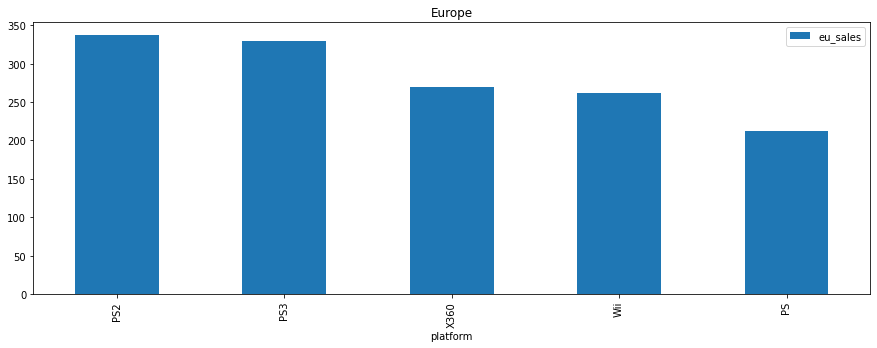

In [65]:
df.pivot_table(index = 'platform', values = 'eu_sales',aggfunc = 'sum')\
.sort_values(by = 'eu_sales',ascending = False).head().plot(kind = 'bar',figsize = (15,5), title = 'Europe');

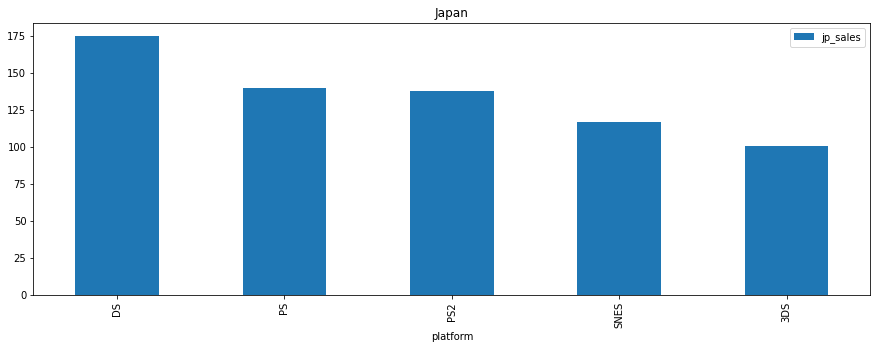

In [66]:
df.pivot_table(index = 'platform', values = 'jp_sales',aggfunc = 'sum')\
.sort_values(by = 'jp_sales',ascending = False).head().plot(kind = 'bar',figsize = (15,5), title = 'Japan');

### Самые популярные жанры (топ-5). Поясните разницу.

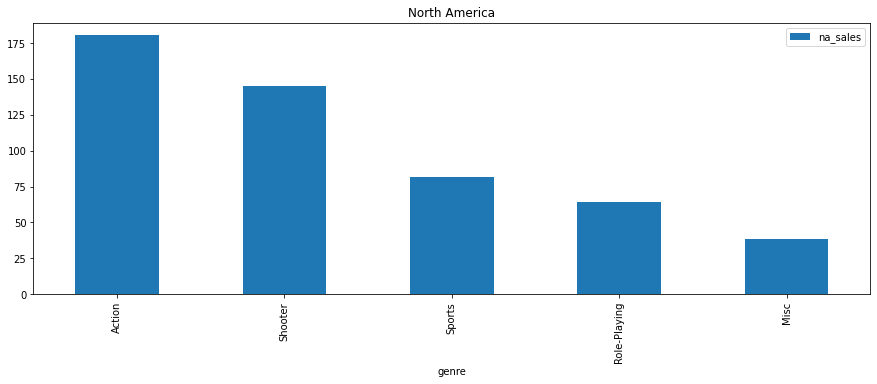

In [67]:
df_actual.pivot_table(index = 'genre', values = 'na_sales',aggfunc = 'sum')\
.sort_values(by = 'na_sales',ascending = False).head().plot(kind = 'bar',figsize = (15,5), title = 'North America');

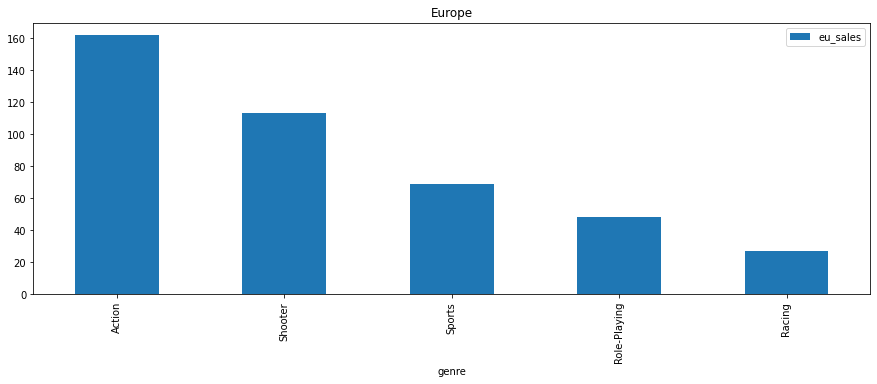

In [68]:
df_actual.pivot_table(index = 'genre', values = 'eu_sales',aggfunc = 'sum')\
.sort_values(by = 'eu_sales',ascending = False).head().plot(kind = 'bar',figsize = (15,5), title = 'Europe');

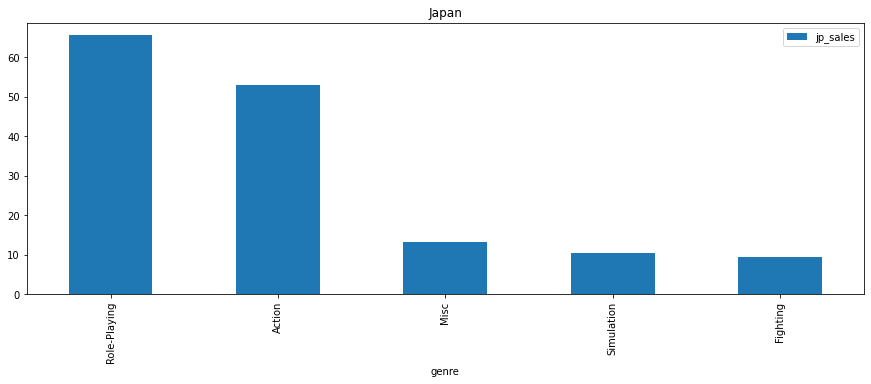

In [69]:
df_actual.pivot_table(index = 'genre', values = 'jp_sales',aggfunc = 'sum')\
.sort_values(by = 'jp_sales',ascending = False).head().plot(kind = 'bar',figsize = (15,5), title = 'Japan');

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [82]:
df_actual['rating'] = df_actual['rating'].fillna('Non-rating')

/tmp/ipykernel_152/3664490442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_actual['rating'] = df_actual['rating'].fillna('Non-rating');


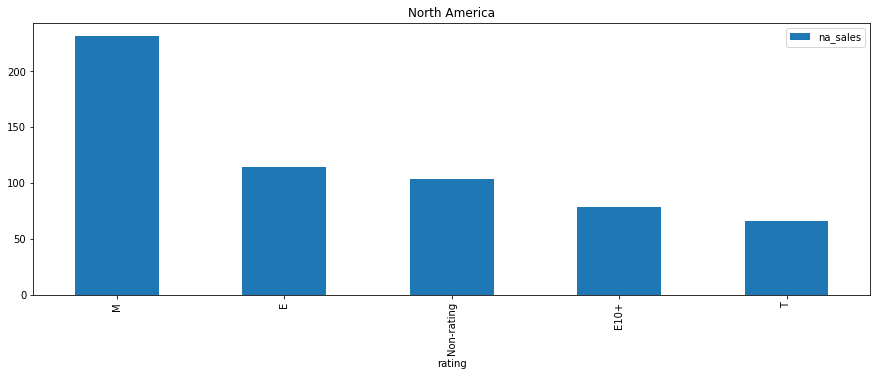

In [71]:
df_actual.pivot_table(index = 'rating', values = 'na_sales',aggfunc = 'sum')\
.sort_values(by = 'na_sales',ascending = False).head().plot(kind = 'bar',figsize = (15,5), title = 'North America');

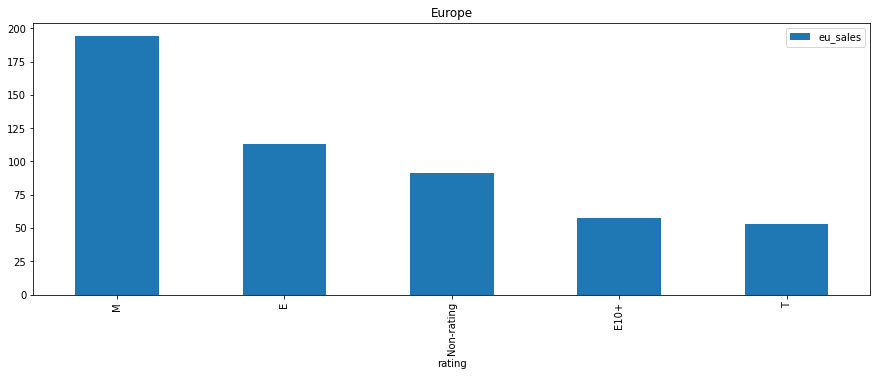

In [72]:
df_actual.pivot_table(index = 'rating', values = 'eu_sales',aggfunc = 'sum')\
.sort_values(by = 'eu_sales',ascending = False).head().plot(kind = 'bar',figsize = (15,5), title = 'Europe');

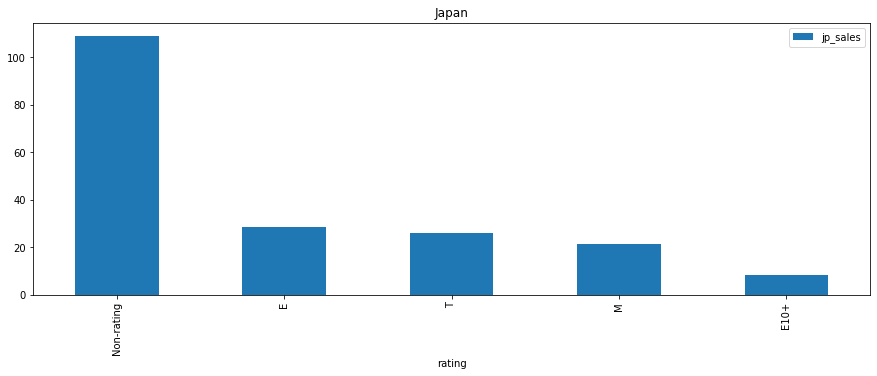

In [73]:
df_actual.pivot_table(index = 'rating', values = 'jp_sales',aggfunc = 'sum')\
.sort_values(by = 'jp_sales',ascending = False).head().plot(kind = 'bar',figsize = (15,5), title = 'Japan');

## Проверьте гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H0 - средние рейтинги пользователей платформ Xbox One и PC одинаковые.

H1 - средние рейтинги пользователей платформ Xbox One и PC разные.

α = 5%

In [74]:
sample1 = df_actual[df_actual['platform'] == 'XOne']['user_score']
sample1 = sample1[~sample1.isna()]

In [75]:
sample2 = df_actual[df_actual['platform'] == 'PC']['user_score']
sample2 = sample2[~sample2.isna()]

In [76]:
results = st.ttest_ind(sample1, sample2, equal_var = False)
alpha = .05

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
    print('средние рейтинги пользователей платформ Xbox One и PC разные')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    print('средние рейтинги пользователей платформ Xbox One и PC одинаковые.')

p-значение:  0.2948662812262724
Не получилось отвергнуть нулевую гипотезу
средние рейтинги пользователей платформ Xbox One и PC одинаковые.


In [77]:
df_actual.query('platform == "XOne" or platform == "PC"')\
.pivot_table(index='platform', values='user_score', aggfunc='mean')

,user_score
platform,
PC,6.448372
XOne,6.604369


### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

H0 - средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.

H1 - средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

α = 5%

In [78]:
sample1 = df_actual[df_actual['genre'] == 'Action']['user_score']
sample1 = sample1[~sample1.isna()]

In [79]:
sample2 = df_actual[df_actual['genre'] == 'Sports']['user_score']
sample2 = sample2[~sample2.isna()]

In [80]:
results = st.ttest_ind(sample1, sample2, equal_var = False)
alpha = .05

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
    print('средние пользовательские рейтинги жанров Action и Sports разные')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    print('средние пользовательские рейтинги жанров Action и Sports одинаковые.')

p-значение:  1.2637989356380714e-25
Отвергаем нулевую гипотезу
средние пользовательские рейтинги жанров Action и Sports разные


In [81]:
df_actual.query('genre == "Action" or genre == "Sports"')\
.pivot_table(index='genre', values='user_score', aggfunc='mean')

,user_score
genre,
Action,6.862623
Sports,5.416290


## Напишите общий вывод

**Общий вывод:**

1.С 1980 по 1995 год выходило менее 100 игр в год, что является очень маленьким показателем (менее 5% от общей доли). Так например в 2004 году вышло больше игр, чем за 15 лет с 1980 по 1995 года.

2.После выхода консоли, игры на неё выпускаются в течении 10 лет(на примере Playstation). Через 5 лет после выхода старой консоли на рынок выходит новая консоль, которая постепенно сдвигает старую консоль, а затем и полностью её заменяет.

3.Из графиков видно, что старые консоли (Wii,PS2,PS3,X360,3DS) хоть и лидируют по продажам с 2012 по 2016 год, но динамика их продаж убывает и стремиться к нулю. А новые консоли (PS4,XOne) только начинают набирать обороты. Малая доля продаж в 2016 году связано с тем, что датасет определён до 2016 года, но не сказано до какого месяца. Так же стоит отметить особую платформу (PC). Она была и будет актуальна за счёт постоянного обновления её начинки. А маленькая доля продаж относительно других консолей связана с тем, что многие игры не выходят на PC, а те которые выходят, взламывают и распространяют бесплатно.

4.Всех больше продаж у X360, PS3 и Wii. PS4 и XOne довольно близки к ним, и в скором времени предпологается, что они выйдут на первые места по продажам.

5.Зависимость оценки критиков значительно больше влияет на кол-во продаж нежели оценки пользователей.

6.Самые популярные жанры platform, sports, shooter. Думаю это связано с большим охватом аудитории. В эти жанры игр могут играть самые разные люди, они отличаются зрелищностью и простотой. А самая низкая продаваемость у strategy. Предположительно это связано с большим порогом входа и сложностью.

7.Европа и Америка очень похожи по своим предпочтениям в жанрах (action,shooter,sports). А в Японии всех больше продаж в жанре Role_playing, доля продаж игр с жанром role_playing превышает следующий по значимости жанр более чем в 2 раза.

8.Во всех трёх регионах самые продаваемые игры с рейтингом E(Для всех.) В Европе и Америке игры с рейтингом M(для взрослых) и T(для подростков) имеют почти одинаковую долю продаж, однако в Японии в с большим отрывом (почти в 4 раза) лидируют игры без рейтинга.

9.Самая популярная консоль в Америке X360, В Европе PS2, В Японии DS. Доля продаж игр в Америке на X360 почти в два раза больше PS2 в Европе и в 4 раза больше DS в Японии.

**Результат исследований:**
Самыми популярными и перспективными консолями в 2017-ом году будут PS4 и XOne, они показывают положительную динамику роста. Самым популярным и стабильным жанром является shooter. Рекламировать игры стоит в Американском регионе с рейтингом M. Насчёт отзывов, стоит обращать внимания на отзывы критиков, отзывы пользователей не влияют на уровень продаж.
